<a href="https://colab.research.google.com/github/bhagya-1997/bhagya-1997/blob/main/Assignment_4_Simple_Linear_Regression_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Bhagyashree Deshpande
### 1. Delivery_time -> Predict delivery time using sorting time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('delivery_time.csv')

In [ ]:
data.rename(columns = {"Delivery Time":"d", "Sorting Time":"s"}, inplace = True)

In [ ]:
data.head(5)

,d,s
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d       21 non-null     float64
 1   s       21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='d', ylabel='Density'>

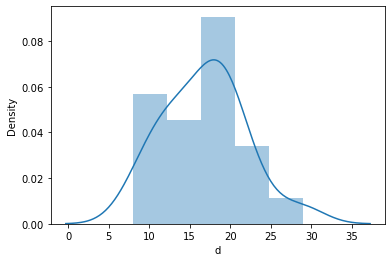

In [ ]:
sns.distplot(data.d)

<AxesSubplot:xlabel='s', ylabel='Density'>

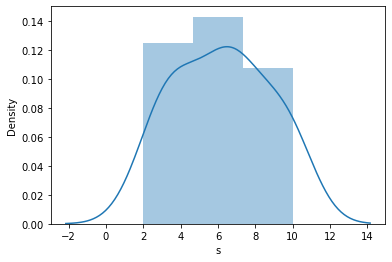

In [ ]:
sns.distplot(data.s)

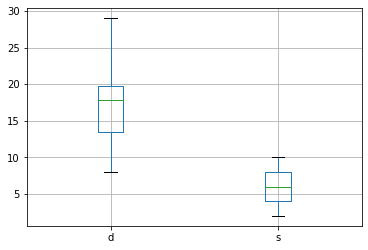

In [ ]:
boxplot = data[["d","s"]].boxplot()

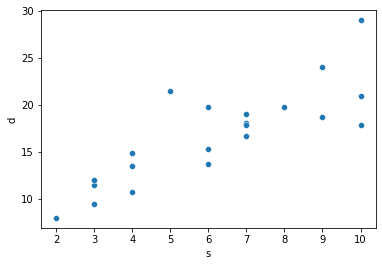

In [ ]:
scatter = sns.scatterplot(x = "s", y = "d", data = data)

In [ ]:
data.corr()

,d,s
d,1.000000,0.825997
s,0.825997,1.000000


<AxesSubplot:>

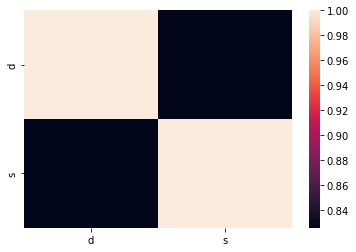

In [ ]:
sns.heatmap(data.corr())

In [ ]:
model = smf.ols("d~np.log(s)", data = data).fit()

In [ ]:
model.params

Intercept    1.159684
np.log(s)    9.043413
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        12:11:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(s)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.tvalues

Intercept    0.472460
np.log(s)    6.586789
dtype: float64

In [ ]:
model.pvalues

Intercept    0.641980
np.log(s)    0.000003
dtype: float64

In [ ]:
data_1 = data.iloc[:,1]

In [ ]:
model.predict(data_1)

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

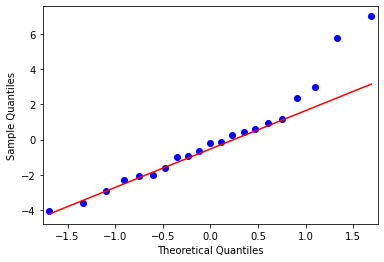

In [ ]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.show()

### 2. Salary_hike -> Build a prediction model for Salary_hike

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.rename(columns = {"YearsExperience":"exp", "Salary":"sal"},inplace=True)

In [ ]:
data.head(5)

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:>

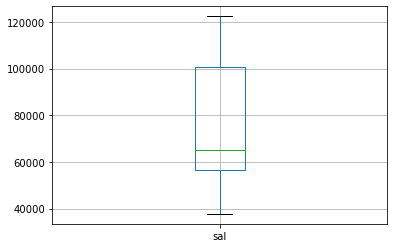

In [ ]:
data[['sal']].boxplot()

<AxesSubplot:>

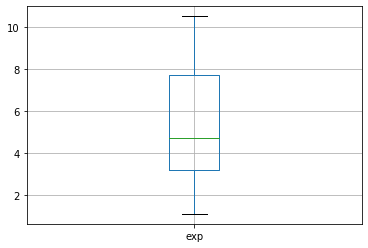

In [ ]:
data[['exp']].boxplot()

<AxesSubplot:xlabel='exp', ylabel='Density'>

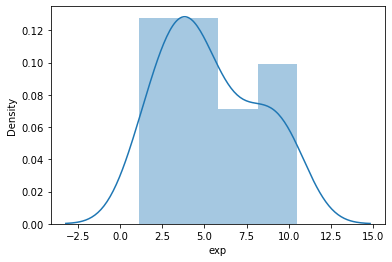

In [ ]:
sns.distplot(data.exp)

<AxesSubplot:xlabel='sal', ylabel='Density'>

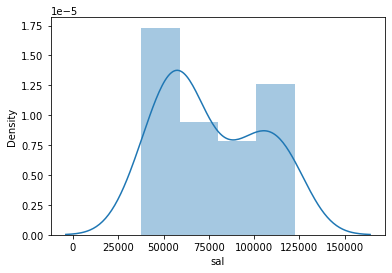

In [ ]:
sns.distplot(data.sal)

<AxesSubplot:xlabel='exp', ylabel='sal'>

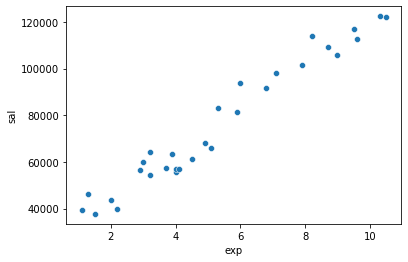

In [ ]:
sns.scatterplot(x = 'exp', y = 'sal', data = data)

<AxesSubplot:xlabel='exp', ylabel='sal'>

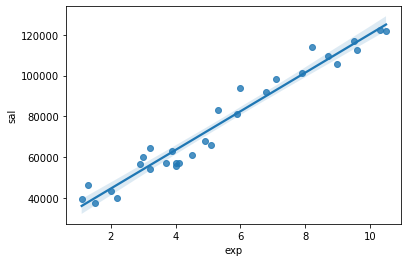

In [ ]:
sns.regplot(x = 'exp', y = 'sal', data = data)

In [ ]:
data.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:>

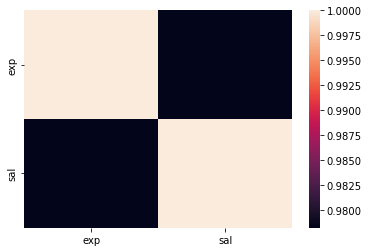

In [ ]:
sns.heatmap(data.corr())

In [ ]:
model = smf.ols('sal~exp+np.square(exp)', data = data).fit()
model.params

Intercept         26214.932677
exp                9259.283888
np.square(exp)       16.392566
dtype: float64

In [ ]:
model.tvalues

Intercept         5.755611
exp               5.112783
np.square(exp)    0.107760
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           3.59e-19
Time:                        12:12:12   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
exp             9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
np.square(exp)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_1 = data.iloc[:,:1]

In [ ]:
model.predict(data_1)

0      36419.979959
1      38279.705169
2      40140.741784
3      44799.070719
4      46664.697252
5      53204.717436
6      54140.317439
7      56012.500998
8      56012.500998
9      60698.697296
10     62575.470775
11     63514.349291
12     63514.349291
13     64453.555659
14     68213.659642
15     71979.009247
16     73863.651157
17     75749.604472
18     81415.332851
19     82360.768394
20     89936.055383
21     92782.197551
22    100386.335458
23    103243.296720
24    108011.455849
25    110876.285543
26    115657.558725
27    116614.796916
28    123324.644086
29    125244.693940
dtype: float64

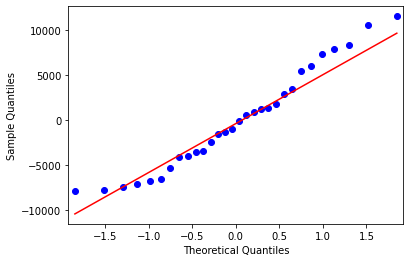

In [ ]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.show()